In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data Cleaning 

In [2]:
inp0 = pd.read_csv("Country-data.csv", sep=",", header=0)
inp0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
inp0.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Type of features

In [4]:
# Number of features in detaset
numeric_columns = inp0.select_dtypes(include=np.number).columns.tolist()
print('numerical features: {}'.format(str(len(numeric_columns))))
categorical_columns = inp0.select_dtypes(include=object).columns.tolist()
print('Categorical features: {}'.format(str(len(categorical_columns))))

numerical features: 9
Categorical features: 1


### Colinerity Analysis

In [5]:
corr_matrix = inp0.corr()

In [1]:
corr_matrix = inp0.corr()
filtered_corr = corr_matrix[corr_matrix<=.9]
plt.figure(figsize=(8,6))
sns.heatmap(filtered_corr, cmap="Greens", annot=True)
plt.title('Correlation Matrix')
plt.show()

NameError: name 'inp0' is not defined

In [177]:
indices = np.where(corr_matrix > 0.2)
indices = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('child_mort', 'inflation'),
 ('child_mort', 'total_fer'),
 ('exports', 'imports'),
 ('exports', 'income'),
 ('exports', 'life_expec'),
 ('exports', 'gdpp'),
 ('health', 'life_expec'),
 ('health', 'gdpp'),
 ('income', 'life_expec'),
 ('income', 'gdpp'),
 ('inflation', 'total_fer'),
 ('life_expec', 'gdpp')]

### Missing values analysis

In [8]:
missingValues= inp0.isnull().sum()
missingValues_percentage = inp0.isnull().sum() / len(inp0) * 100
missing_values_df = pd.concat([missingValues,missingValues_percentage], axis=1)
missing_values_df.rename(columns = {0: 'NA Count', 1: 'Missing Percentage'}, inplace = True)

In [9]:
missing_values_df.sort_values(by=['Missing Percentage'], ascending=False,inplace=True)
missing_values_df[missing_values_df['Missing Percentage']>0]

,NA Count,Missing Percentage


### Handling Outliers

In [10]:
inp0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
inp0['health']=(inp0['health']*inp0['gdpp'])/100
inp0['imports']=(inp0['imports']*inp0['gdpp'])/100
inp0['income']=(inp0['income']*inp0['gdpp'])/100
inp0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


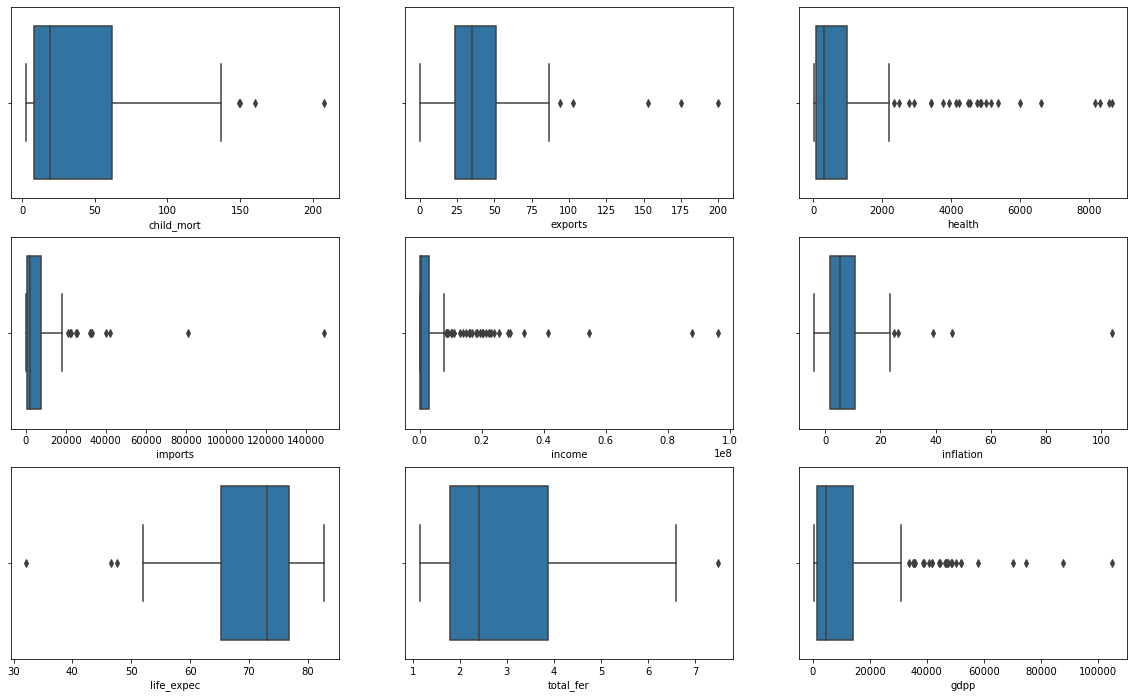

In [12]:
# plotting boxplot to check if outliers are present for numeric variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(inp0.child_mort)
plt.subplot(3,3,2)
sns.boxplot(inp0.exports)
plt.subplot(3,3,3)
sns.boxplot(inp0.health)
plt.subplot(3,3,4)
sns.boxplot(inp0.imports)
plt.subplot(3,3,5)
sns.boxplot(inp0.income)
plt.subplot(3,3,6)
sns.boxplot(inp0.inflation)
plt.subplot(3,3,7)
sns.boxplot(inp0.life_expec)
plt.subplot(3,3,8)
sns.boxplot(inp0.total_fer)
plt.subplot(3,3,9)
sns.boxplot(inp0.gdpp)
plt.show()


#### Outlier Analysis:
- All the features are having outliers.
- Income, GDPP and Health are hvaing most of the outliers among all.
- 
- Due to the small size of the dataset outliers cannot be removed directly.
- We are using capping technique and setting a bound from 5th percentile - 95th percentile for further analysis.

In [13]:
inp0.shape

(167, 10)

##### Removing outliers for further analysis

In [110]:
outliers_df = inp0.copy()

In [190]:
for i, var in enumerate(outliers_df[numeric_columns]):
    Q1 = outliers_df[var].quantile(0.05)
    Q3 = outliers_df[var].quantile(0.90)
    IQR = Q3 - Q1
    outliers_df = outliers_df[(outliers_df[var] >= Q1 - 2*IQR) & (outliers_df[var] <= Q3 + 2*IQR)]

In [191]:
outliers_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,cluster_labels
count,160.000000,160.000000,160.000000,160.000000,1.600000e+02,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,38.966250,38.724369,898.137838,4662.648013,3.501521e+06,7.387281,70.220000,2.975625,10810.525000,1.237500,0.112500
std,40.014947,21.804880,1508.040657,6455.898079,6.523901e+06,7.526307,8.804314,1.509633,14040.662703,0.893636,0.371763
min,2.600000,0.109000,12.821200,0.651092,1.764840e+03,-4.210000,32.100000,1.230000,231.000000,0.000000,0.000000
25%,9.675000,23.325000,68.251000,591.472500,4.515700e+04,1.872500,65.125000,1.830000,1310.000000,0.000000,0.000000
50%,20.050000,34.900000,297.416000,1981.770000,4.402050e+05,5.415000,72.650000,2.475000,4550.000000,2.000000,0.000000
75%,62.200000,50.625000,853.695000,6331.170000,2.509950e+06,10.950000,76.525000,3.952500,12675.000000,2.000000,0.000000
90%,99.830000,67.610000,2976.272000,12006.680000,1.417176e+07,16.610000,80.120000,5.313000,35350.000000,2.000000,0.000000
95%,116.000000,76.460000,4754.830000,17731.635000,2.016504e+07,20.805000,81.305000,5.884000,44585.000000,2.000000,1.000000
99%,154.100000,89.729000,6242.483000,32197.112000,2.672204e+07,31.707000,82.000000,6.566400,51982.000000,2.000000,2.000000


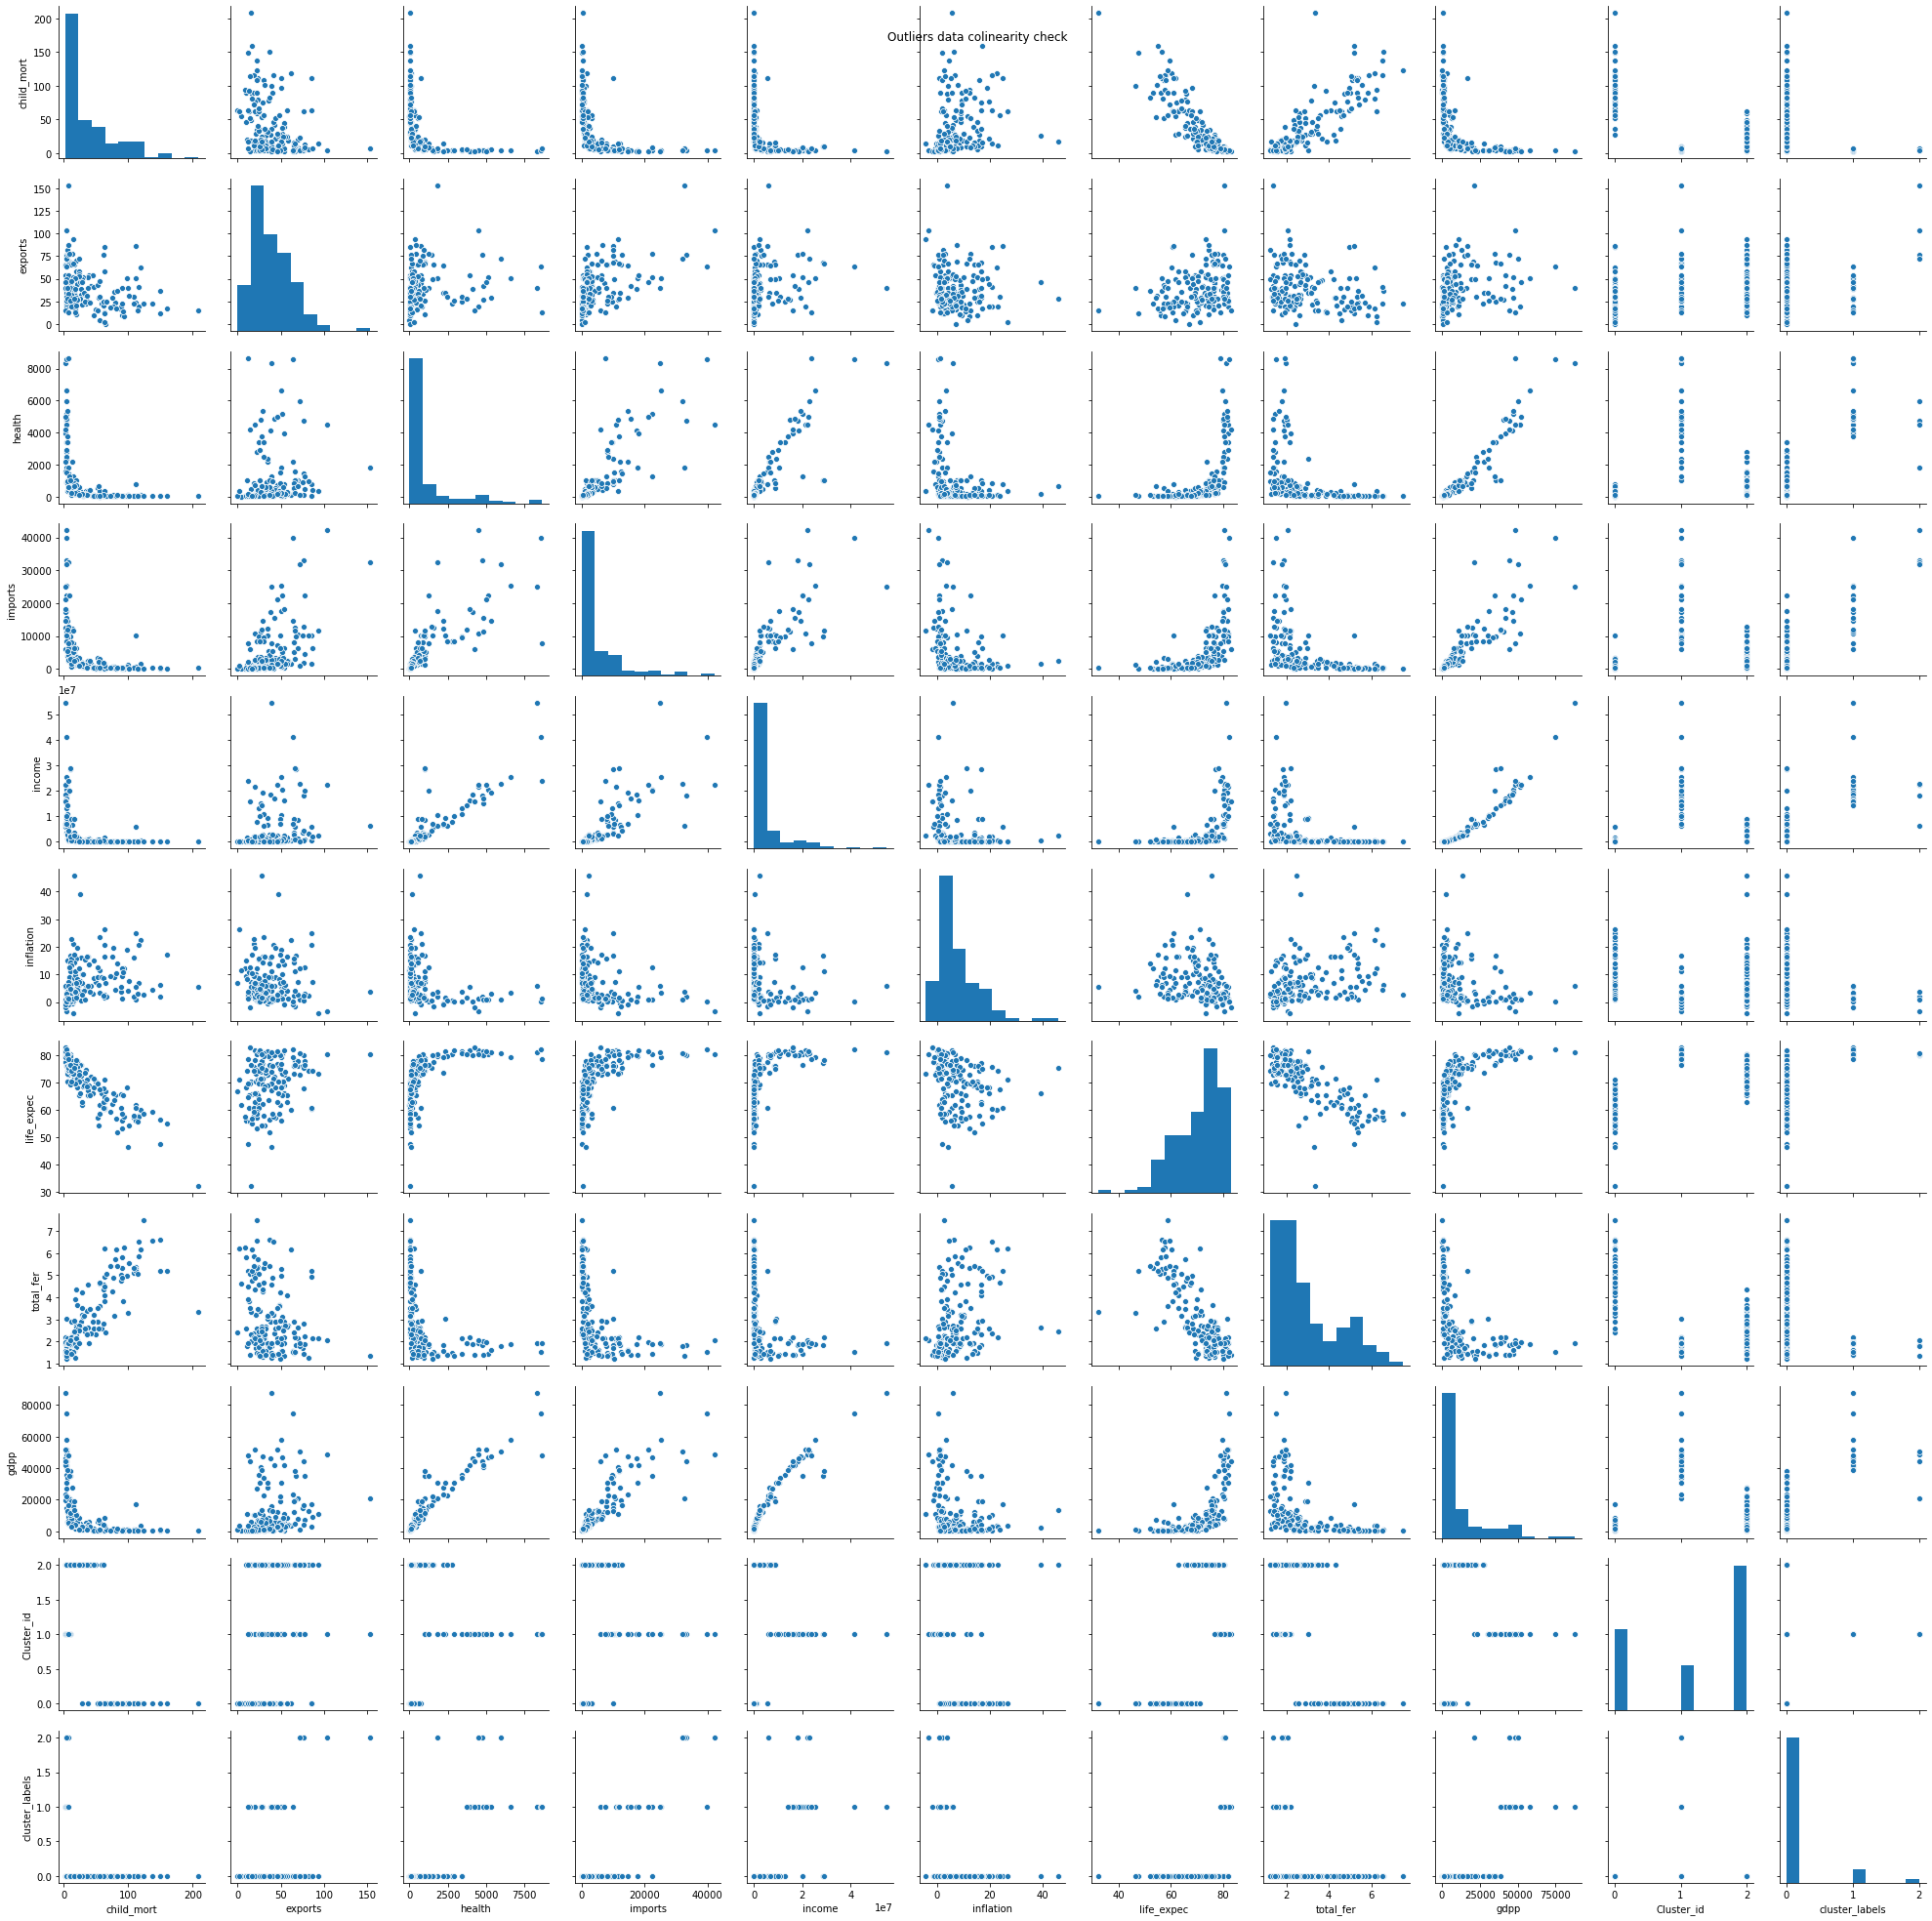

In [175]:
sns.pairplot(outliers_df)
plt.suptitle('Outliers data colinearity check')
plt.show()

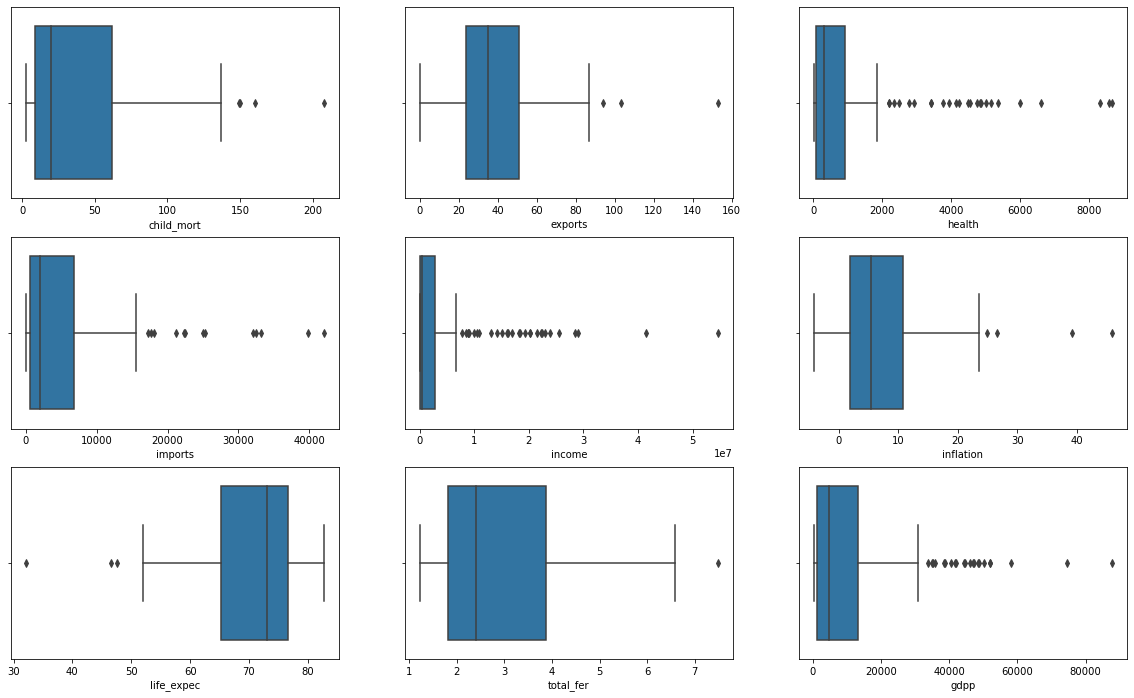

In [176]:
# plotting boxplot to check outliers are present.
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(outliers_df.child_mort)
plt.subplot(3,3,2)
sns.boxplot(outliers_df.exports)
plt.subplot(3,3,3)
sns.boxplot(outliers_df.health)
plt.subplot(3,3,4)
sns.boxplot(outliers_df.imports)
plt.subplot(3,3,5)
sns.boxplot(outliers_df.income)
plt.subplot(3,3,6)
sns.boxplot(outliers_df.inflation)
plt.subplot(3,3,7)
sns.boxplot(outliers_df.life_expec)
plt.subplot(3,3,8)
sns.boxplot(outliers_df.total_fer)
plt.subplot(3,3,9)
sns.boxplot(outliers_df.gdpp)
plt.show()


#### Data rescaling

In [192]:
# 2. rescaling
rfm_df = outliers_df[numeric_columns]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

C:\Users\so333572\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\so333572\AppData\Roaming\Python\Python36\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(160, 9)

In [193]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = numeric_columns
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.284385,-1.321473,-0.569553,-0.685917,-0.537038,0.273596,-1.597401,1.890066,-0.732852
1,-0.560702,-0.493378,-0.419234,-0.415636,-0.475958,-0.386163,0.692739,-0.880868,-0.480150
2,-0.292463,-0.014923,-0.473722,-0.506893,-0.449941,1.161270,0.715526,-0.056897,-0.453715
3,2.006376,1.084604,-0.530514,-0.489190,-0.506383,2.000962,-1.153045,2.115993,-0.520159
4,-0.718638,0.311715,-0.108079,0.392056,-0.180107,-0.792680,0.749707,-0.561911,0.099271


### PCA 


In [194]:
from sklearn.decomposition import PCA

In [195]:
pca = PCA()
pca.fit(rfm_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [196]:
## explained_variance_ratio - it explains how much variene is explained by each features indepenently.  
pca.explained_variance_ratio_

array([0.56781087, 0.15671036, 0.1140833 , 0.09626484, 0.02579501,
       0.0152604 , 0.0124531 , 0.00948461, 0.00213749])

#### Cumulative variance plot

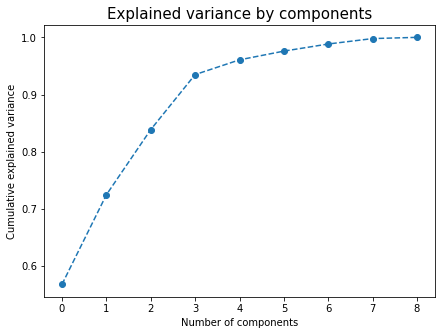

In [197]:
plt.figure(figsize=(7,5))
plt.plot(range(0,9), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components', fontsize=15)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

#### `Inferences`
- Cumulative variance plot shows the amount of varience captured by the number of components we have in the x-axis. 
- Almost 95% of the data can be explained by 5components. Hence, we will be preserving aprox 95% of the varience and will use 5 components.


In [198]:
pca_df = pd.DataFrame(pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = rfm_df_scaled.index)

In [199]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':list(rfm_df_scaled.columns)})
pcs_df.head(10)

,PC1,PC2,Feature
0,-0.338881,0.478370,child_mort
1,0.178001,-0.193452,exports
2,0.373999,0.356338,health
3,0.383862,0.198028,imports
4,0.371920,0.374780,income
5,-0.164138,0.000457,inflation
6,0.362824,-0.341747,life_expec
7,-0.323041,0.467569,total_fer
8,0.406186,0.302777,gdpp


##### Ploting principal component PC1 and PC2 

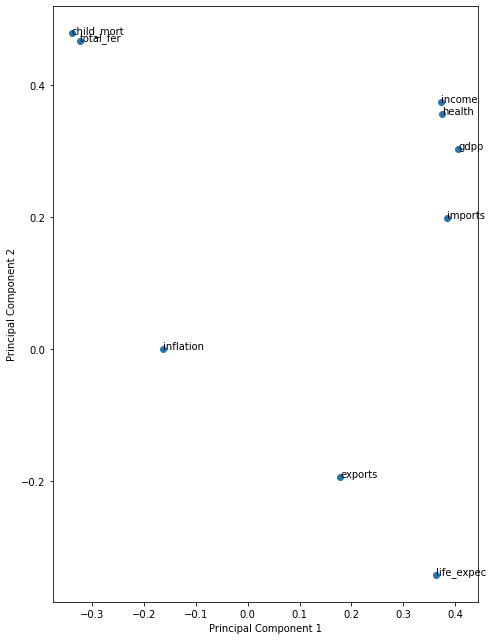

In [200]:
fig = plt.figure(figsize = (7,9))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [201]:
# Repeating PCA with 5 components
final_pca=PCA(n_components=5) 

In [202]:
pca_df=final_pca.fit_transform(rfm_df_scaled)
pca_df.shape

(160, 5)

##### Checking the correlation after PCA

In [203]:
corr_matrix_pca = np.corrcoef(pca_df.transpose())
filtered_corr = corr_matrix_pca[corr_matrix_pca<=.4]

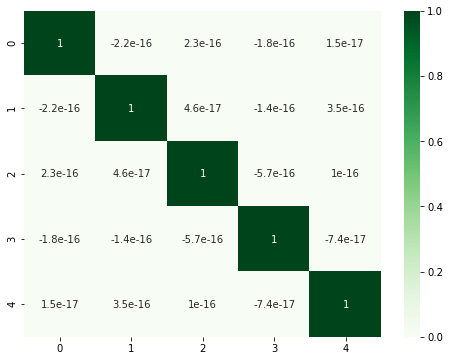

In [204]:
# Checking the correlation after PCA
corr_matrix_pca = np.corrcoef(pca_df.transpose())
#filtered_corr = corr_matrix_pca[corr_matrix_pca<=.4]
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_pca, cmap="Greens", annot=True)
plt.show()

In [205]:
pca_df = pd.DataFrame(pca_df, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = rfm_df_scaled.index)

In [206]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.879248,1.537875,-0.468978,0.063492,-0.253027
1,0.013083,-1.377017,-0.879544,0.055578,0.063573
2,-0.539548,-0.982808,0.377107,1.096749,-0.390750
3,-2.703009,1.501117,2.362301,0.485434,-0.475488
4,0.966070,-0.921699,-0.261393,-0.588560,-0.269842


In [207]:
pcs_df_features = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':list(rfm_df_scaled.columns)})
pcs_df_features.head(10)

,PC1,PC2,Feature
0,-0.338881,0.478370,child_mort
1,0.178001,-0.193452,exports
2,0.373999,0.356338,health
3,0.383862,0.198028,imports
4,0.371920,0.374780,income
5,-0.164138,0.000457,inflation
6,0.362824,-0.341747,life_expec
7,-0.323041,0.467569,total_fer
8,0.406186,0.302777,gdpp


### K_Means with PCA dataset

In [208]:
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#### Silhouette Analysis to choose optimal K

For n_clusters=2, the silhouette score is 0.4615046156145247
For n_clusters=3, the silhouette score is 0.3838429746906916
For n_clusters=4, the silhouette score is 0.3098011253067511
For n_clusters=5, the silhouette score is 0.3237804294435948
For n_clusters=6, the silhouette score is 0.2967720880833027
For n_clusters=7, the silhouette score is 0.24860441415093293
For n_clusters=8, the silhouette score is 0.2764747837306879


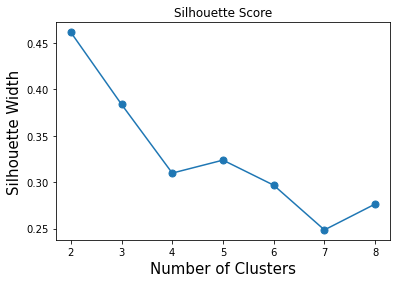

In [209]:
## Silhouette Analysis to choose correct number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
ss = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=200)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    ss.append([num_clusters, silhouette_score(pca_df, cluster_labels)])
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1],marker='o',markersize=7)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Silhouette Width',fontsize=15)
plt.title("Silhouette Score")
plt.show()
    

According to Silhouette Analysis our K-Means model will be trained on 3 clusters

In [210]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [211]:
# cluster labels
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0,
       2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 0, 0])

In [212]:
# Merging cluster labels in original dataset

outliers_df['Cluster_id']=kmeans.labels_
outliers_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,2,0


In [213]:
pca_df['Cluster_label']=kmeans.labels_
pca_df.set_index(outliers_df.country,inplace=True)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.879248,1.537875,-0.468978,0.063492,-0.253027,0
Albania,0.013083,-1.377017,-0.879544,0.055578,0.063573,2
Algeria,-0.539548,-0.982808,0.377107,1.096749,-0.390750,2
Angola,-2.703009,1.501117,2.362301,0.485434,-0.475488,0
Antigua and Barbuda,0.966070,-0.921699,-0.261393,-0.588560,-0.269842,2


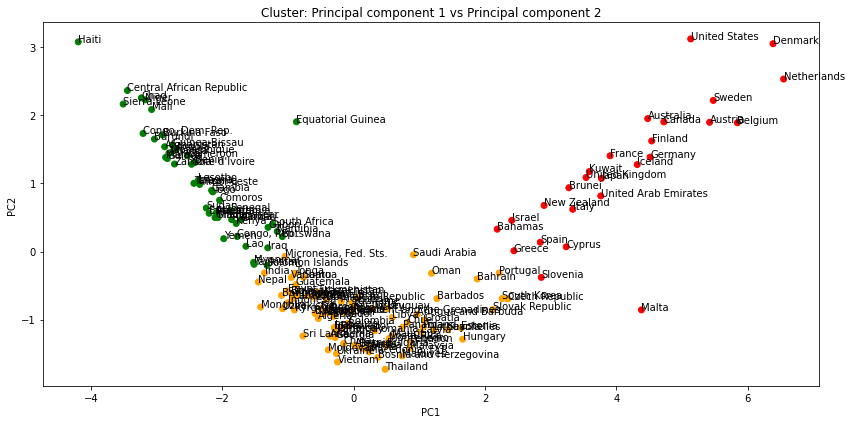

In [214]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)
%matplotlib inline                  
fig = plt.figure(figsize = (12,6))   # setting the figure size
plt.title("Cluster: Principal component 1 vs Principal component 2")
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1],
            c = pca_df.Cluster_label.map({0:'green',1:'red',2:'orange',3:'blue'}))
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

### K-Means cluster analysis 

In [215]:
pca_df.Cluster_label.value_counts().reset_index()

,index,Cluster_label
0,2,85
1,0,49
2,1,26


In [216]:
df_cluster1= outliers_df[['child_mort','income','gdpp','Cluster_id']]
df_cluster1 = df_cluster1.groupby('Cluster_id').mean()
df_cluster1

,child_mort,income,gdpp
Cluster_id,,,
0,89.471429,2.246481e+05,1857.918367
1,5.396154,1.646865e+07,39350.000000
2,20.120000,1.424125e+06,7241.717647


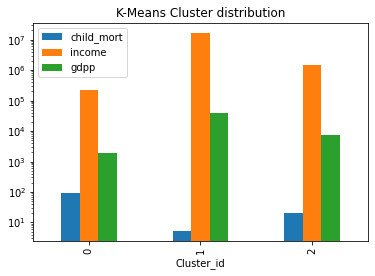

In [217]:
df_cluster1.groupby('Cluster_id').mean().plot(kind='bar',logy=True)
plt.title("K-Means Cluster distribution")
plt.show()

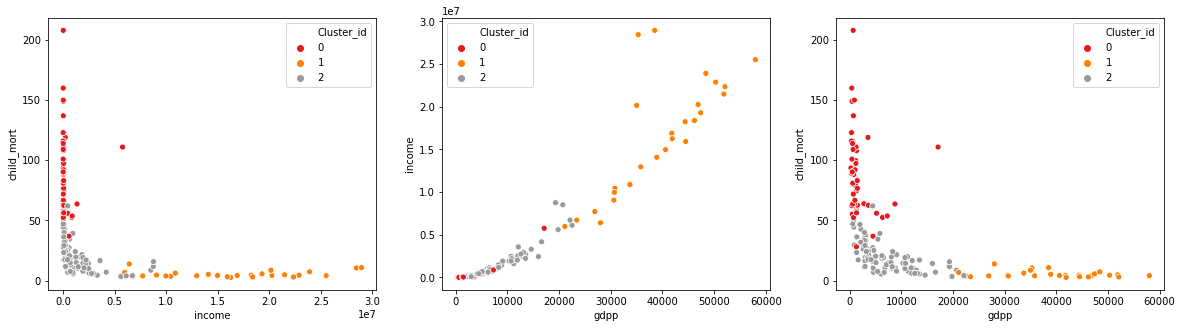

In [218]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='income', y='child_mort', hue='Cluster_id', data=outliers_df, palette='Set1');
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='income', hue='Cluster_id', data=outliers_df, palette='Set1');
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_id', data=outliers_df, palette='Set1');
plt.show()

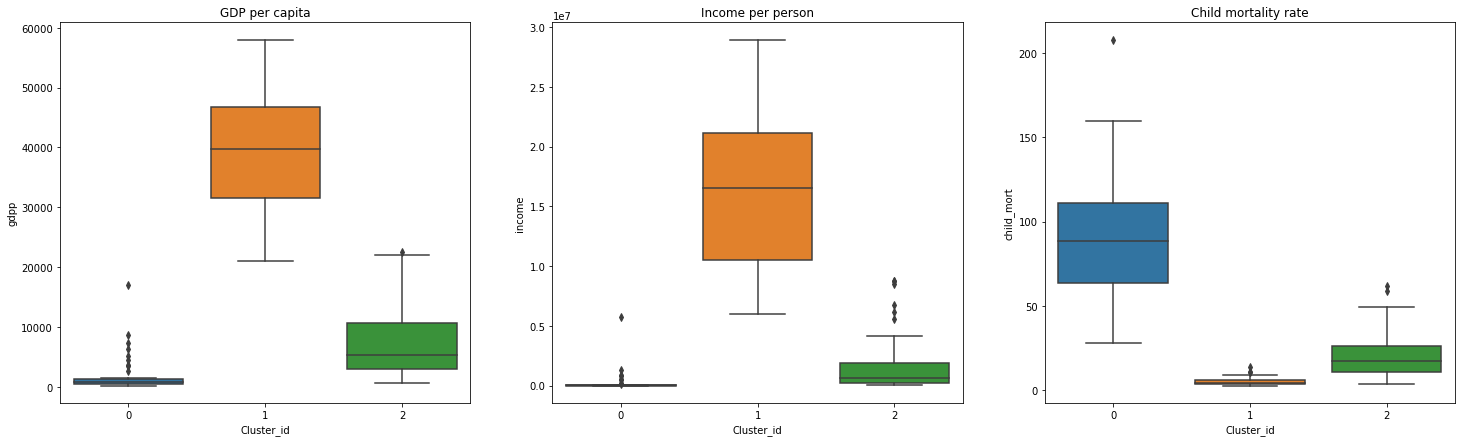

In [219]:
f, ax = plt.subplots(1, 3, figsize=(25,7))
sns.boxplot(x='Cluster_id',y='gdpp',data=outliers_df,ax=ax[0])
ax[0].set_title('GDP per capita')
sns.boxplot(x='Cluster_id',y='income',data=outliers_df,ax=ax[1])
ax[1].set_title('Income per person')
sns.boxplot(x='Cluster_id',y='child_mort',data=outliers_df,ax=ax[2])
ax[2].set_title('Child mortality rate')
plt.show()

#### `Inferences`
    - Cluster 0: holds under developed countries, where GDP per capita and income are low and chile mortality rate is very high.
- Cluster 1: holds developing countries where, GDPP and income is comparitivly low and child mortality rate is also low. 
- Cluster 2: holds all developed countries where,GDPP, income are high value and child mortality rate is less.

Under developed countries are part of Cluster_0 and we should be looking at top 5 countries for immidiate need of aid.

In [220]:
#outliers_df[outliers_df['Cluster_id'] ==2].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False])

In [221]:
top5 = outliers_df[outliers_df['Cluster_id'] ==0].sort_values(
    by = ['income', 'gdpp', 'child_mort'], 
    ascending = [True, True, False]).head(7)

In [222]:
top5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,cluster_labels
26,Burundi,93.6,8.92,26.7960,90.552,1764.84,12.30,57.7,6.26,231,0,0
37,"Congo, Dem. Rep.",116.0,41.10,26.4194,165.664,2034.06,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,38.5860,302.802,2289.00,5.47,60.8,5.02,327,0,0
112,Niger,123.0,22.20,17.9568,170.868,2832.72,2.55,58.8,7.49,348,0,0
106,Mozambique,101.0,31.50,21.8299,193.578,3846.42,7.64,54.5,5.56,419,0,0
31,Central African Republic,149.0,11.80,17.7508,118.190,3960.48,2.01,47.5,5.21,446,0,0
94,Malawi,90.5,22.80,30.2481,160.191,4727.70,12.10,53.1,5.31,459,0,0


According to the analysis of K-Means clustering we have identified below five countries are in dire need of aid.
- Congo Dem. Rep
- Liberia 
- Burundi 
- Niger 
- Mozambique

## Heirarchichal Clustering


In [223]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.879248,1.537875,-0.468978,0.063492,-0.253027,0
Albania,0.013083,-1.377017,-0.879544,0.055578,0.063573,2
Algeria,-0.539548,-0.982808,0.377107,1.096749,-0.390750,2
Angola,-2.703009,1.501117,2.362301,0.485434,-0.475488,0
Antigua and Barbuda,0.966070,-0.921699,-0.261393,-0.588560,-0.269842,2


In [224]:

df_cluster_hier=pca_df.drop('Cluster_label',1)
#df_cluster_hier.reset_index(drop=True, inplace=True)
df_cluster_hier.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-2.879248,1.537875,-0.468978,0.063492,-0.253027
Albania,0.013083,-1.377017,-0.879544,0.055578,0.063573
Algeria,-0.539548,-0.982808,0.377107,1.096749,-0.390750
Angola,-2.703009,1.501117,2.362301,0.485434,-0.475488
Antigua and Barbuda,0.966070,-0.921699,-0.261393,-0.588560,-0.269842


In [225]:
outliers_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,2,0


#### Single Linkage

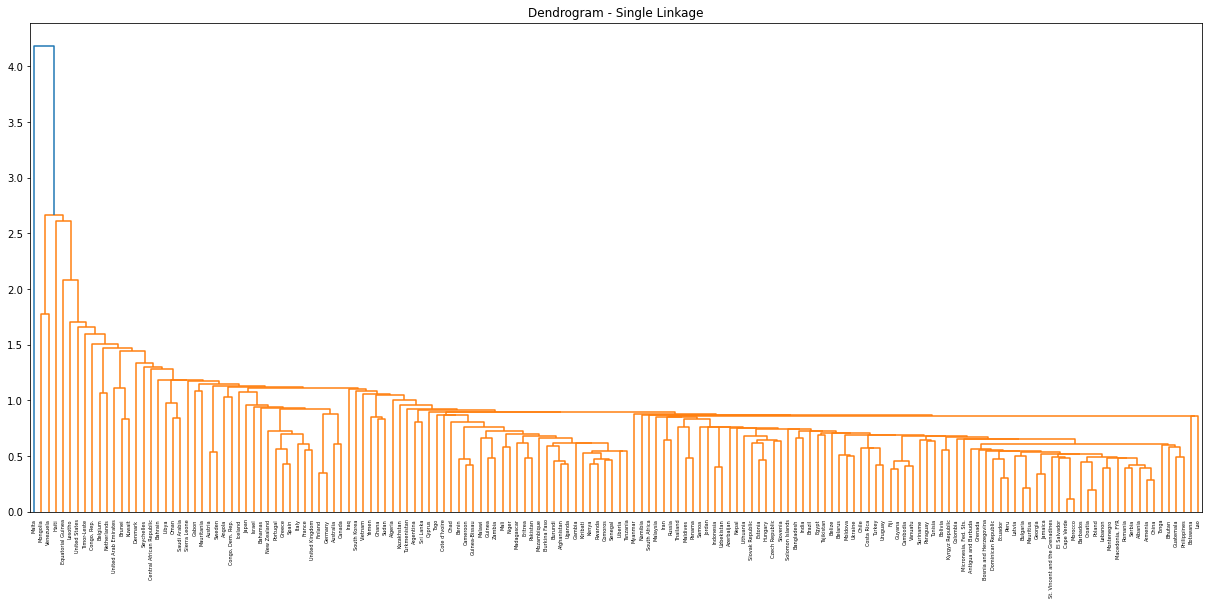

In [226]:
# single linkage
plt.figure(figsize=(21,9))
mergings = linkage(df_cluster_hier, method="single", metric='euclidean')
dendrogram(mergings,labels=df_cluster_hier.index)
plt.title("Dendrogram - Single Linkage")
plt.show()

#### Complete Linkage

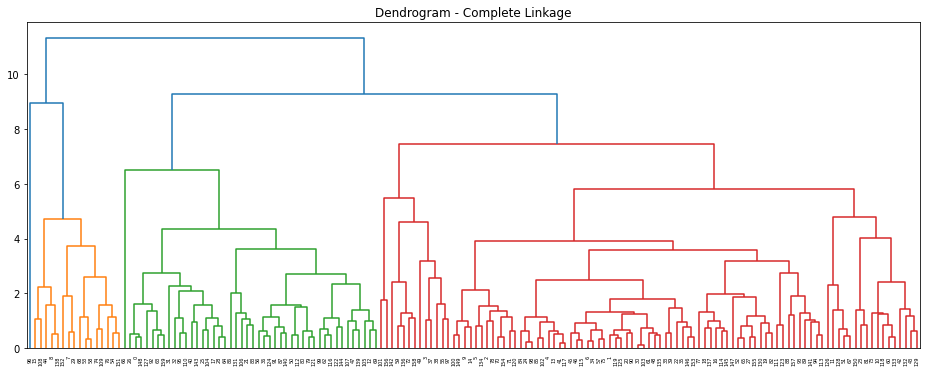

In [228]:
# complete linkage
plt.figure(figsize=(16,6))
mergings = linkage(df_cluster_hier, method="complete", metric='euclidean')
dendrogram(mergings)#,labels=df_cluster_hier.index, color_threshold=6.5 
plt.title("Dendrogram - Complete Linkage")
plt.show()

Based on the dataset and outlier treatment we will proceed with 3 clusters. Tried with 75th percentile to get 3cluster dendogram but we considerd 5th to 95th percentile for model building

In [229]:
df_cluster2 = cut_tree(mergings, n_clusters=3).reshape(-1, )
df_cluster2

array([0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 0])

In [230]:
outliers_df['cluster_labels'] = df_cluster2
outliers_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,2,1


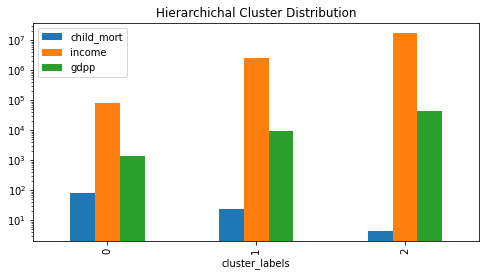

In [238]:
df_cluster2= outliers_df[['child_mort','income','gdpp','cluster_labels']]
df_cluster2 = df_cluster2.groupby('cluster_labels').mean()


df_cluster2.groupby('cluster_labels').mean().plot(kind='bar',logy=True, figsize=(8,4))
plt.title("Hierarchichal Cluster Distribution")
plt.show()

In [239]:
df_cluster2.head()

,child_mort,income,gdpp
cluster_labels,,,
0,82.732609,8.281417e+04,1391.608696
1,24.241237,2.640589e+06,9502.783505
2,4.558824,1.766452e+07,43758.823529


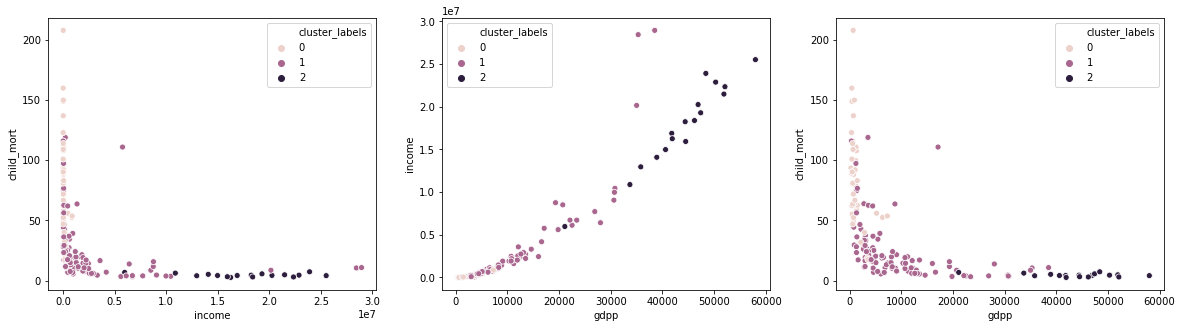

In [232]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels', data=outliers_df);
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels', data=outliers_df);
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels', data=outliers_df);
plt.show()

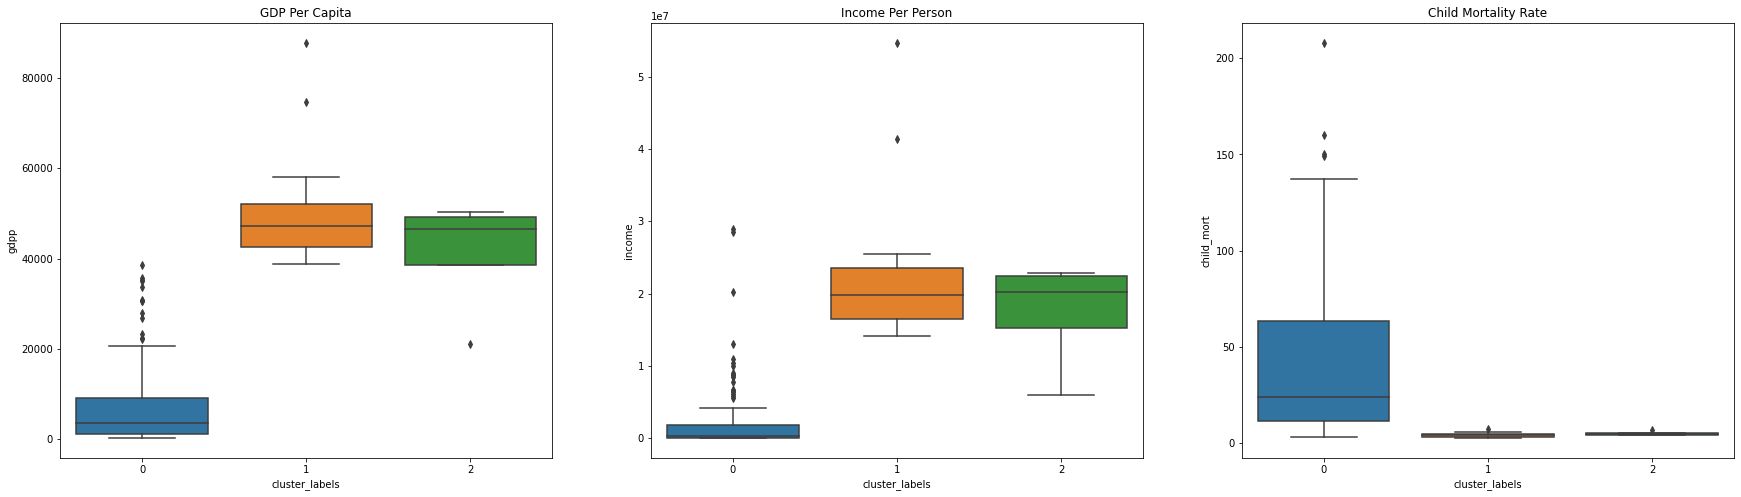

In [163]:
f, ax = plt.subplots(1, 3, figsize=(30,8))
sns.boxplot(x='cluster_labels',y='gdpp',data=outliers_df,ax=ax[0])
ax[0].set_title('GDP Per Capita')
sns.boxplot(x='cluster_labels',y='income',data=outliers_df,ax=ax[1])
ax[1].set_title('Income Per Person')
sns.boxplot(x='cluster_labels',y='child_mort',data=outliers_df,ax=ax[2])
ax[2].set_title('Child Mortality Rate')
plt.show()

In [157]:
top5 = outliers_df[outliers_df['cluster_labels'] ==0].sort_values(
    by = ['income', 'gdpp', 'child_mort'], 
    ascending = [True, True, False]).head(5)

In [158]:
top5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,cluster_labels
26,Burundi,93.6,8.92,26.7960,90.552,1764.84,12.30,57.7,6.26,231,0,0
37,"Congo, Dem. Rep.",116.0,41.10,26.4194,165.664,2034.06,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,38.5860,302.802,2289.00,5.47,60.8,5.02,327,0,0
112,Niger,123.0,22.20,17.9568,170.868,2832.72,2.55,58.8,7.49,348,0,0
106,Mozambique,101.0,31.50,21.8299,193.578,3846.42,7.64,54.5,5.56,419,0,0


#### `Inferences`
- Heirarchichal cluster properties are almost same as K-Means cluster we have and the data distribution for gdpp, child_mort and income look similar. 
- Cluster 0: holds under developed countries, where GDP per capita and income are low and chile mortality rate is very high.
- Cluster 1: holds developing countries where, GDPP and income is comparitivly low and child mortality rate is also low. 
- Cluster 2: holds all developed countries where,GDPP, income are high value and child mortality rate is less.
- Five countries are in dire need of aid.
    - Burundi
    - Congo, Dem. Rep
    - Liberia
    - Niger
    - Mozambique

### Cluster Comparison: K-Means and Heirarchichal 

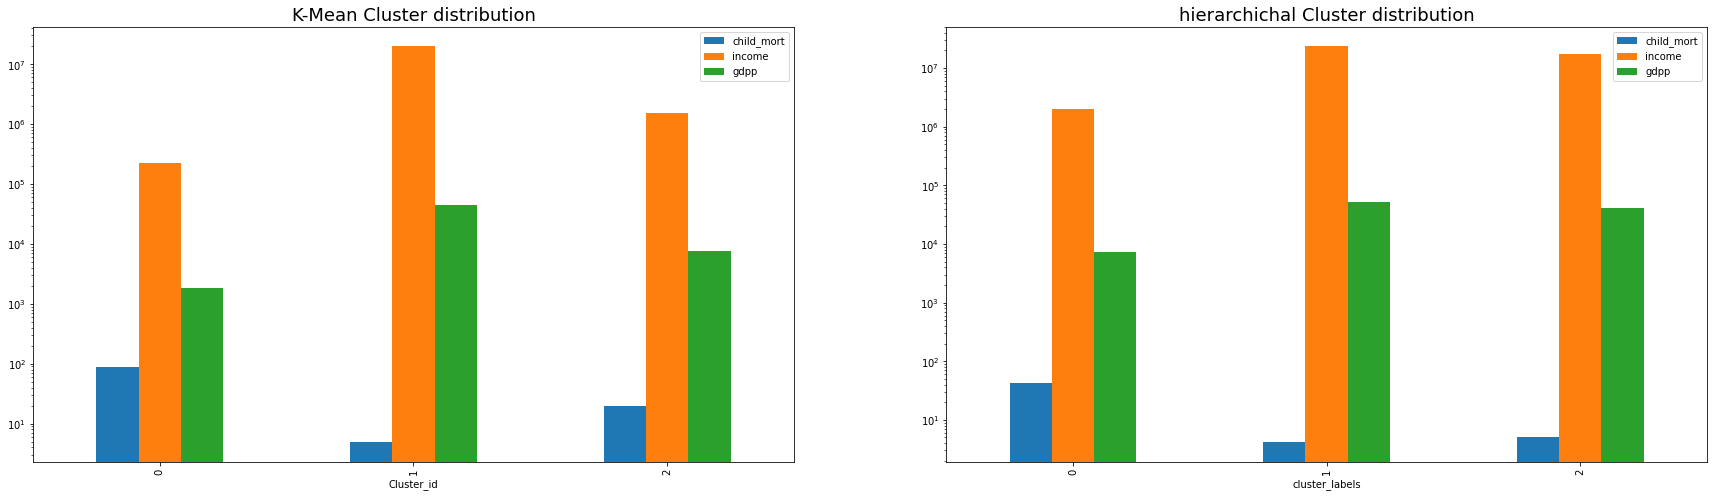

In [174]:
f, ax = plt.subplots(1, 2, figsize=(30,8))
df_cluster1.groupby('Cluster_id').mean().plot(kind='bar',logy=True, ax=ax[0]);
ax[0].set_title("K-Mean Cluster distribution", fontsize=18)
df_cluster2.groupby('cluster_labels').mean().plot(kind='bar',logy=True, ax=ax[1]);
ax[1].set_title("hierarchichal Cluster distribution", fontsize=18)
plt.show()

Distribution of GDPP, income and child mortality rate are looking similar in both the clusters in terms of identifying the developed and under developed countries